This script generates quantum circuit for a two-body time-evolution operator under a Hamiltonian $$ H = \sum_{i<j}^{N} J_{ij} \vec{\sigma_i} \cdot \vec{\sigma_j}, $$  where the coupling constant of the pair interaction given by $ J_{ij} \equiv \mu/N * (1-cos(\theta_{ij})) $ and $ \vec{\sigma_i} $ are the Pauli matrices for the i-th qubit. The operator $ u_{ij}(dt) $ is the time-evolution operator for time dt. The two-body part of the propagator, as approximated in Eq. (17) of the paper, is the product of pair terms of the form

$$
u_{ij}(dt) = e^{-idtJ_{ij}(X \otimes X + Y \otimes Y + Z \otimes Z)}. \tag{1.1}
$$


We recall the Matrix Representations:

$$
R_{ZZ}(\theta) = \exp\left(-i \frac{\theta}{2} Z \otimes Z\right) = \begin{pmatrix}
e^{-i\theta/2} & 0 & 0 & 0 \\
0 & e^{i\theta/2} & 0 & 0 \\
0 & 0 & e^{i\theta/2} & 0 \\
0 & 0 & 0 & e^{-i\theta/2}
\end{pmatrix}
$$

$$
R_{YY}(\theta) = \exp\left(-\frac{i\theta}{2} Y \otimes Y\right) = \begin{pmatrix}
\cos\left(\frac{\theta}{2}\right) & 0 & 0 & i\sin\left(\frac{\theta}{2}\right) \\
0 & \cos\left(\frac{\theta}{2}\right) & -i\sin\left(\frac{\theta}{2}\right) & 0 \\
0 & -i\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right) & 0 \\
i\sin\left(\frac{\theta}{2}\right) & 0 & 0 & \cos\left(\frac{\theta}{2}\right)
\end{pmatrix}
$$

$$
R_{XX}(\theta) = \exp\left(-\frac{i\theta}{2} X \otimes X\right) = \begin{pmatrix}
\cos\left(\frac{\theta}{2}\right) & 0 & 0 & -i\sin\left(\frac{\theta}{2}\right) \\
0 & \cos\left(\frac{\theta}{2}\right) & -i\sin\left(\frac{\theta}{2}\right) & 0 \\
0 & -i\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right) & 0 \\
-i\sin\left(\frac{\theta}{2}\right) & 0 & 0 & \cos\left(\frac{\theta}{2}\right)
\end{pmatrix}
$$

### Examples:

- For $ \theta = 0 $, the `RZZ` gate is the identity matrix $ I $.
- For $ \theta = 2 \pi $, the `RZZ` gate is the identity matrix -$ I \$.
- For $ \theta = \pi $, the `RZZ` gate is $ iZ \otimes Z $.


- For $ \theta = 0 $, the `RYY` gate is the identity matrix $I $.
- For $ \theta = \pi $, the `RYY` gate is $ iY \otimes Y $.

- For $ \theta = 0 $, the `RXX` gate is the identity matrix $ I $.
- For $ \theta = \pi $, the `RXX` gate is $ iX \otimes X $.


But we also know that unitary operator from Eq (1.1) evolution can be written as:
$$\psi(t) = e^{-iH \Delta t} \psi(0) \\
         = e^{-i \Delta t \sum_{i<j}^N J_{ij} \sigma_i \cdot \sigma_j} \psi(0)  \\ 
         = e^{-i \Delta t J_{ij} X \otimes X} e^{-i \Delta t J_{ij} Y \otimes Y} e^{-i \Delta t J_{ij} Z \otimes Z} \psi(0)  \tag{1.2}
$$ 
(also note $\Delta t$ = dt from above)

So comparing the expression from above $RZZ(\theta) = \exp\left(-\frac{i\theta}{2}Z \otimes Z\right) $ with Eq.(1.2) we realize $\theta/2 = \Delta t J_{ij} $ for $\sigma_z \cdot \sigma_z$ and similarly for x and y compnenets substitue this $\theta$. Hence plugging in this expression for $\theta$ in the Eq(1.2) we get: 

$$ \psi(t) = RXX(2 \Delta t J_{ij}) RYY(2 \Delta t J_{ij}) RZZ(2 \Delta t J_{ij}) \psi(0) \tag{1.3} $$ 



We generate the exact two-body quantum circuit for this hamitonian below: 

/home/zohalaraib/.local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


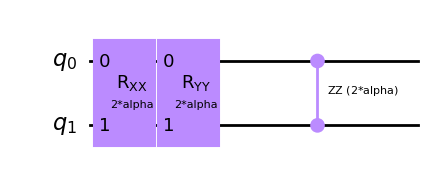

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from math import pi

# Define the parameter alpha = dt* J_ij
alpha = Parameter('alpha')

# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

# Apply the RXX gate to generate the X \otimes X gate with theta = 2 *alpha
qc.rxx(2 *alpha, 0, 1)
# Apply the RYY gate to generate the Y \otimes Y gate with theta = 2 *alpha
qc.ryy(2 *alpha, 0, 1)
# Apply the RZZ gate to generate the Z \otimes Z gate with theta = 2 *alpha
qc.rzz(2 *alpha, 0, 1)

# Display the circuit
qc.draw('mpl')